In [ ]:
import pandas as pd
import numpy as np
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
import os
import nltk
import random
df=pd.read_csv('airplane_labeled.csv',lineterminator='\n')
data=df.copy()

In [ ]:
df=df.replace({'sentiment':{'LABEL_2\r':'Positive','LABEL_0\r':'Negative','LABEL_1\r':'Neutral'}})
df

,Unnamed: 0,tweet,sentiment\r
0,0,['during a demonstration flight a us army flye...,Negative
1,1,during a demonstration flight a us army flyer ...,Negative
2,2,first us dirigible akron exploded just offshor...,Negative
3,3,the first fatal airplane accident in canada oc...,Negative
4,4,the airship flew into a thunderstorm and encou...,Negative
...,...,...,...
5264,5264,while on approach the military transport crash...,Negative
5265,5265,the cargo plane crashed while on approach to i...,Negative
5266,5266,the airbus went missing over the atlantiocean ...,Negative
5267,5267,the air ambulance crashed into hills while att...,Negative


In [ ]:
df.describe()

,Unnamed: 0
count,5269.000000
mean,2634.000000
std,1521.173615
min,0.000000
25%,1317.000000
50%,2634.000000
75%,3951.000000
max,5268.000000


In [ ]:
temp = df.groupby('sentiment\r').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,tweet
0,Negative,3674
1,Neutral,1205


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


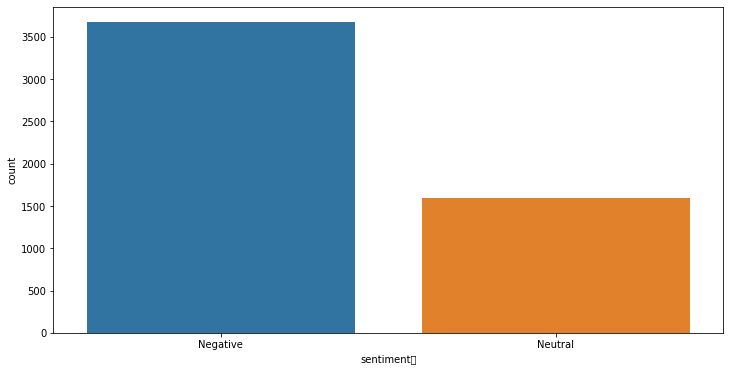

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment\r',data=df)

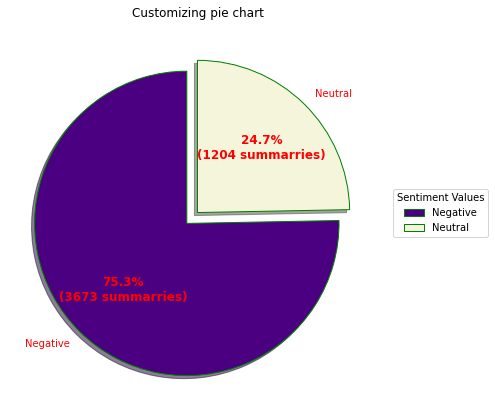

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
sentiment = ['Negative', 'Neutral']
data = [3674, 1205]
explode = (0.1, 0.0)
colors = ("indigo", "beige")
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} summarries)".format(pct, absolute)

fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                autopct = lambda pct: func(pct, data),
                                explode = explode,
                                labels = sentiment,
                                shadow = True,
                                colors = colors,
                                startangle = 90,
                                wedgeprops = wp,
                                textprops = dict(color ="red"))

ax.legend(wedges, sentiment,
        title ="Sentiment Values",
        loc ="center left",
        bbox_to_anchor =(1, 0, 0.5, 1))
plt.setp(autotexts, size = 12, weight ="bold")
ax.set_title("Customizing pie chart")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

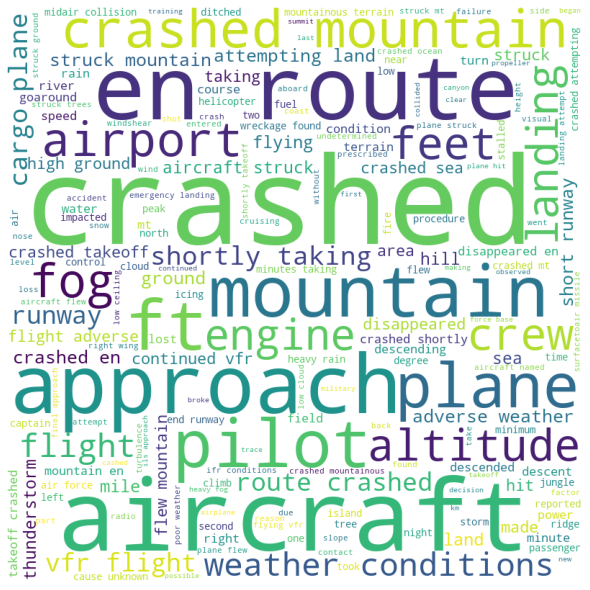

In [ ]:
neg=df[df['sentiment\r']=='Negative']
neg = neg.dropna()
neu=df[df['sentiment\r']=='Neutral']
neu = neu.dropna()
comment_words = ''
stopwords = set(STOPWORDS)
a=df
for val in neu.tweet:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" " 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

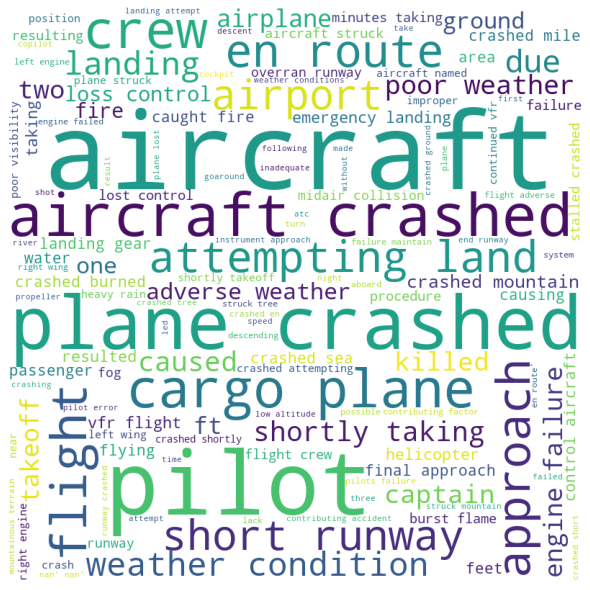

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
a=df
for val in neg.tweet:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" " 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()